In [1]:
import requests
# BABA是阿里巴巴公司的股票代码
stock_code = "BABA"
# 构造完整的获取股票历史信息的网页URL
url = 'https://finance.yahoo.com/quote/%s/history?p=%s' % (stock_code, stock_code)
# 获取上述URL对应的网页
r = requests.get(url)
print(r)

<Response [200]>


In [2]:
import re
# 定义正则表达式，找到所有需要的股票历史数据
result = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text)
# 如果没有找到数据，prices就是None
if result is not None:
    print(result)

['[{"date":1610398801,"open":229.89999389648438,"high":230.82449340820312,"low":225.86000061035156,"close":227.3699951171875,"volume":22516411,"adjclose":227.3699951171875},{"date":1610116200,"open":227.8800048828125,"high":238.60000610351562,"low":226.68299865722656,"close":236.19000244140625,"volume":34822500,"adjclose":236.19000244140625},{"date":1610029800,"open":229.30999755859375,"high":229.9499969482422,"low":220.08999633789062,"close":226.89999389648438,"volume":49361800,"adjclose":226.89999389648438},{"date":1609943400,"open":234.9499969482422,"high":238.3000030517578,"low":225.86000061035156,"close":227.61000061035156,"volume":37146100,"adjclose":227.61000061035156},{"date":1609857000,"open":229.0500030517578,"high":240.75999450683594,"low":228.1199951171875,"close":240.39999389648438,"volume":35823800,"adjclose":240.39999389648438},{"date":1609770600,"open":226.5,"high":230.3800048828125,"low":225.0399932861328,"close":227.85000610351562,"volume":24897900,"adjclose":227.8500

In [3]:
# 提取所需股票价格
prices = eval(result[0])
prices[0]

{'date': 1610398801,
 'open': 229.89999389648438,
 'high': 230.82449340820312,
 'low': 225.86000061035156,
 'close': 227.3699951171875,
 'volume': 22516411,
 'adjclose': 227.3699951171875}

In [4]:
# 数据清洗
quotes = [item for item in prices if not 'type' in item]
quotes[1]

{'date': 1610116200,
 'open': 227.8800048828125,
 'high': 238.60000610351562,
 'low': 226.68299865722656,
 'close': 236.19000244140625,
 'volume': 34822500,
 'adjclose': 236.19000244140625}

In [5]:
from datetime import date
# 同时，需要将数据中date字段中的时间戳转换成更加直观的日期格式
list1 = []
for i in range(len(quotes)):
    x = date.fromtimestamp(quotes[i]['date'])
    y = date.strftime(x,'%Y-%m-%d')
    list1.append(y)
list1[1]

'2021-01-08'

In [6]:
import pandas as pd
# 使用pandas模块提供的DataFrame对象存储股票数据，并将刚才的日期作为索引列的值
quotesdf_ori = pd.DataFrame(quotes, index = list1)
quotesdf_ori

,date,open,high,low,close,volume,adjclose
2021-01-12,1610398801,229.899994,230.824493,225.860001,227.369995,22516411,227.369995
2021-01-08,1610116200,227.880005,238.600006,226.682999,236.190002,34822500,236.190002
2021-01-07,1610029800,229.309998,229.949997,220.089996,226.899994,49361800,226.899994
2021-01-06,1609943400,234.949997,238.300003,225.860001,227.610001,37146100,227.610001
2021-01-05,1609857000,229.050003,240.759995,228.119995,240.399994,35823800,240.399994
...,...,...,...,...,...,...,...
2020-01-17,1579271400,225.899994,228.000000,225.350006,227.429993,12956200,227.429993
2020-01-16,1579185000,226.300003,226.330002,222.729996,223.940002,13700500,223.940002
2020-01-15,1579098600,226.649994,227.820007,224.389999,225.059998,10743400,225.059998
2020-01-14,1579012200,230.050003,230.175003,224.880005,226.490005,17266900,226.490005


In [7]:
# 去掉原始数据中的时间戳数据，并按照月份进行分组
import time
quotesdf = quotesdf_ori.drop(['date'], axis = 1)  # axis=1表示从某列中删除，axis=0表示从某行中删除
templist = []
for i in range(len(quotesdf)):
    temp = time.strptime(quotesdf.index[i],"%Y-%m-%d") # strptime()函数根据指定的格式把一个时间字符串解析为时间对象
    templist.append("{}/{:02}".format(temp.tm_year%100,temp.tm_mon))  # "{:02}"表示将月份改成2位且带前导0的格式
tempdf = quotesdf.copy()
tempdf['month'] = templist
tempdf

,open,high,low,close,volume,adjclose,month
2021-01-12,229.899994,230.824493,225.860001,227.369995,22516411,227.369995,21/01
2021-01-08,227.880005,238.600006,226.682999,236.190002,34822500,236.190002,21/01
2021-01-07,229.309998,229.949997,220.089996,226.899994,49361800,226.899994,21/01
2021-01-06,234.949997,238.300003,225.860001,227.610001,37146100,227.610001,21/01
2021-01-05,229.050003,240.759995,228.119995,240.399994,35823800,240.399994,21/01
...,...,...,...,...,...,...,...
2020-01-17,225.899994,228.000000,225.350006,227.429993,12956200,227.429993,20/01
2020-01-16,226.300003,226.330002,222.729996,223.940002,13700500,223.940002,20/01
2020-01-15,226.649994,227.820007,224.389999,225.059998,10743400,225.059998,20/01
2020-01-14,230.050003,230.175003,224.880005,226.490005,17266900,226.490005,20/01


In [9]:
# 通过对月份数据进行分组操作，求出苹果公司近一年来，每个月的平均收盘价
avgPrices = tempdf.groupby('month').close.mean()
avgPrices

month
20/01    218.128571
20/02    215.670527
20/03    193.393638
20/04    201.817142
20/05    202.727999
20/06    219.383182
20/07    248.038182
20/08    265.569524
20/09    277.543812
20/10    303.048183
20/11    274.844498
20/12    254.746818
21/01    231.053332
Name: close, dtype: float64

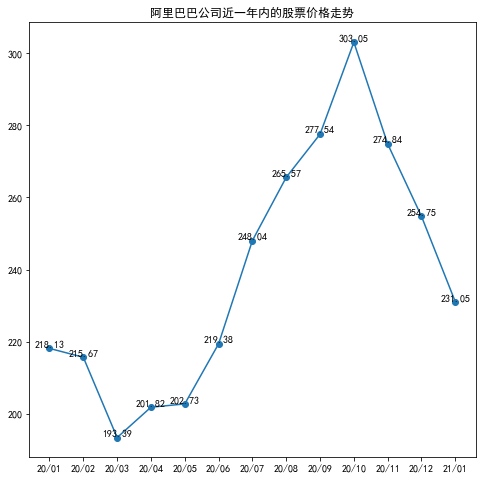

In [12]:
import matplotlib.pyplot as plt
# 将上述数据表示成折线图
x = list(avgPrices.index)
y = avgPrices.values
plt.figure(figsize=(8,8))
plt.plot(x, y,"-o")
# 在图表中加入中文标题的问题
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r"//System//Library//Fonts//STHeiti Medium.ttc", size=16)
plt.title("阿里巴巴公司近一年内的股票价格走势")
# # 为每一个点加上数据标签
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.title('阿里巴巴公司近一年内的股票价格走势')
for a,b in zip(x,y):
    plt.text(a,b,"%.2f"%b,ha='center',va='bottom')
plt.show()